# Number of rows

In [29]:
import pandas as pd

In [30]:
aods = c3.Simulation3HourlyAODOutput.fetch({"limit": -1}).objs.toJson()

In [31]:
df = pd.DataFrame(aods)

In [32]:
df['latitude'].unique().size

144

In [33]:
df['longitude'].unique().size

192

In [34]:
df['time'].unique().size

8

In [35]:
df['dust'].unique().size

220513

In [36]:
df['solubleAitkenMode'].unique().size

220300

In [37]:
df['solubleAccumulationMode'].unique().size

220280

In [38]:
df['solubleCoarseMode'].unique().size

220732

In [39]:
df['insolubleAitkenMode'].unique().size

220582

# Upsert Latitude type

In [40]:
lats = df['latitude'].unique()

In [42]:
lats = pd.DataFrame(lats)

In [46]:
lats.columns = ['value']

In [47]:
lats

,value
0,-65.625
1,-73.125
2,-53.125
3,61.875
4,-68.125
...,...
139,-78.125
140,51.875
141,46.875
142,-38.125


In [48]:
output_records = lats.to_dict(orient="records")

In [49]:
c3.Latitude.upsertBatch(objs=output_records)

c3.ObjList<Latitude>(
 stats=c3.Stats(
         createdObjCount=144,
         updatedObjCount=0,
         removedObjCount=0,
         failedObjCount=0,
         objCount=144,
         dbWait=0.0,
         time=0.276,
         dbTime=0.042946664,
         objsPerSecond=521.7391304347825,
         dbObjsPerSecond=3352.9961721823142),
 objs=c3.Arry<Latitude>([c3.Latitude(
         id='79466e69-496d-44d5-9a8b-120ea43a9304',
         meta=c3.Meta(
                created=datetime.datetime(2022, 3, 17, 17, 29, 50, tzinfo=datetime.timezone.utc),
                updated=datetime.datetime(2022, 3, 17, 17, 29, 50, tzinfo=datetime.timezone.utc),
                timestamp=datetime.datetime(2022, 3, 17, 17, 29, 50, tzinfo=datetime.timezone.utc)),
         version=1),
        c3.Latitude(
         id='c1d7bf5c-69fd-4432-8fd5-b289e60ced1a',
         meta=c3.Meta(
                created=datetime.datetime(2022, 3, 17, 17, 29, 50, tzinfo=datetime.timezone.utc),
                updated=datetime.datetime

# NetCDF files content

In [2]:
file_name = "azure://monthly-mean-simulations/bs714a.pb" + "20170801" + ".pp_" + "002" + ".nc"

In [9]:
sample = c3.NetCDFUtil.openFile(file_name)
print (sample["time"])
import numpy as np
print(np.array(sample["time"]))
print(417108/(365.25*24))

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    axis: T
    units: hours since 1970-01-01 00:00:00
    standard_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (8,)
filling on, default _FillValue of 9.969209968386869e+36 used
[417096.33333333 417099.33333333 417102.33333333 417105.33333333
 417108.33333333 417111.33333333 417114.33333333 417117.33333333]
47.582477754962355


In [17]:
tensor = sample["atmosphere_optical_thickness_due_to_dust_ambient_aerosol"][:][2,:,:,:]

In [19]:
tensor.shape

(8, 144, 192)

In [23]:
thing = sample["atmosphere_optical_thickness_due_to_dust_ambient_aerosol"][:]

In [24]:
thing.shape

(6, 8, 144, 192)

In [26]:
element = sample["atmosphere_optical_thickness_due_to_dust_ambient_aerosol"][:][2,5,15,20]

In [27]:
element

2.7867785e-05

In [30]:
import pandas as pd

In [28]:
variable_names = {
            "dust" : "atmosphere_optical_thickness_due_to_dust_ambient_aerosol",
            "solubleAitkenMode" : "atmosphere_optical_thickness_due_to_soluble_aitken_mode_ambient_aerosol",
            "solubleAccumulationMode" : "atmosphere_optical_thickness_due_to_soluble_accumulation_mode_ambient_aerosol",
            "solubleCoarseMode" : "atmosphere_optical_thickness_due_to_soluble_coarse_mode_ambient_aerosol",
            "insolubleAitkenMode" : "atmosphere_optical_thickness_due_to_insoluble_aitken_mode_ambient_aerosol"
        }

In [41]:
file = c3.SimulationOutputFile.fetch({"filter": "container == 'monthly-mean'"}).objs[0]

In [44]:
ts = file.dateTag
times = [ts.replace(hour=3), ts.replace(hour=6), ts.replace(hour=9), 
            ts.replace(hour=12), ts.replace(hour=15), ts.replace(hour=18), 
            ts.replace(hour=21), ts.replace(hour=0)]
lats = sample["latitude"][:]
lons = [x*(x < 180) + (x - 360)*(x >= 180) for x in sample["longitude"][:]]

In [57]:
variable_names = {
            "dust" : "atmosphere_optical_thickness_due_to_dust_ambient_aerosol",
            "solubleAitkenMode" : "atmosphere_optical_thickness_due_to_soluble_aitken_mode_ambient_aerosol",
            "solubleAccumulationMode" : "atmosphere_optical_thickness_due_to_soluble_accumulation_mode_ambient_aerosol",
            "solubleCoarseMode" : "atmosphere_optical_thickness_due_to_soluble_coarse_mode_ambient_aerosol",
            "insolubleAitkenMode" : "atmosphere_optical_thickness_due_to_insoluble_aitken_mode_ambient_aerosol"
        }

file_name = "azure://monthly-mean-simulations/bs714a.pb" + "20170801" + ".pp_" + "002" + ".nc"
sample = c3.NetCDFUtil.openFile(file_name)

ts = file.dateTag
times = [ts.replace(hour=3), ts.replace(hour=6), ts.replace(hour=9), 
            ts.replace(hour=12), ts.replace(hour=15), ts.replace(hour=18), 
            ts.replace(hour=21), ts.replace(hour=0)]
lats = sample["latitude"][:]
lons = [x*(x < 180) + (x - 360)*(x >= 180) for x in sample["longitude"][:]]

df = pd.DataFrame()
row = pd.Series({'time':times[0], 'latitude':lats[0], 'longitude':lons[0]})
for var in variable_names.items():
    row[var[0]] = 0.0 
for i,time in enumerate(times):
    row['time'] = time
    for j,lat in enumerate(lats):
        row['latitude'] = lat
        for k,lon in enumerate(lons):
            row['longitude'] = lon
            for var in variable_names.items():
                row[var[0]] = sample[var[1]][:][2,i,j,k]

KeyboardInterrupt: 

The above cell just takes too long

In [59]:
import numpy as np

In [101]:
df = pd.DataFrame()

for var in variable_names.items():
    tensor = sample[var[1]][:][2,:,:,:]
    tensor = np.array(tensor).flatten()
    df[var[0]] = tensor


lat = sample["latitude"][:]
lats = []
for l in lat:
    filt = c3.Filter().eq("value", float(l))
    obj = c3.Latitude.fetch({'filter': c3.Filter().eq("value", float(l))}).objs[0]
    lats.append(obj)
    
lon = [x*(x < 180) + (x - 360)*(x >= 180) for x in sample["longitude"][:]]

ts = file.dateTag

times = [ts.replace(hour=3), ts.replace(hour=6), ts.replace(hour=9), 
                    ts.replace(hour=12), ts.replace(hour=15), ts.replace(hour=18), 
                    ts.replace(hour=21), ts.replace(hour=0)]

df["time"] = [t for t in times for n in range(0, len(lat)*len(lon))]
df["latitude"] = [l for l in lat for n in range(0, len(lon))]*len(times)
df["longitude"] = [l for l in lon]*len(times)*len(lat)

In [102]:
lats

[c3.Latitude(
 id='1dcf1423-b090-4eb9-b0b6-7e93182c221e',
 meta=c3.Meta(
        tenantTagId=151,
        tenant='dev',
        tag='tc02d',
        created=datetime.datetime(2022, 3, 17, 17, 29, 50, tzinfo=datetime.timezone.utc),
        createdBy='babreu@illinois.edu',
        updated=datetime.datetime(2022, 3, 17, 17, 29, 50, tzinfo=datetime.timezone.utc),
        updatedBy='babreu@illinois.edu',
        timestamp=datetime.datetime(2022, 3, 17, 17, 29, 50, tzinfo=datetime.timezone.utc),
        fetchInclude='[]',
        fetchType='Latitude'),
 version=1,
 value=-89.375),
 c3.Latitude(
 id='4e0d383e-0480-4db4-9b9d-d74993baeb0b',
 meta=c3.Meta(
        tenantTagId=151,
        tenant='dev',
        tag='tc02d',
        created=datetime.datetime(2022, 3, 17, 17, 29, 50, tzinfo=datetime.timezone.utc),
        createdBy='babreu@illinois.edu',
        updated=datetime.datetime(2022, 3, 17, 17, 29, 50, tzinfo=datetime.timezone.utc),
        updatedBy='babreu@illinois.edu',
        timesta

In [3]:
aods = c3.Simulation3HourlyAODOutput.fetch({"limit": -1}).objs.toJson()

# Look into sizes (digression)

In [7]:
# https://goshippo.com/blog/measure-real-size-any-python-object/


def get_size(obj, seen=None):
    """Recursively finds size of objects"""
    import sys
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_size(v, seen) for v in obj.values()])
        size += sum([get_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_size(i, seen) for i in obj])
    return size

In [8]:
x = [1,2,3,4]

In [9]:
size = get_size(x)

In [10]:
size

208

In [12]:
import pandas as pd

In [13]:
x = pd.DataFrame(x)

In [14]:
size = get_size(x)

In [15]:
size

3495

This is just a comment.

Python is great, yes.
But it also brings programmers too far away from computers.

- Storing 4 integers in a list takes 208 bytes of memory.
- Storing 4 integers in a pandas dataframe takes 3.5 kB of memory.
- Each integer is a 32-bit thing, so 4 integers should optimally occupy 16 bytes.


In [16]:
x = 1
print(get_size(x))

28


- 4 bytes are for the raw integer number
- The remaining 24 bytes are for a refcount and a reference to the object's type (and some other obscure things that I don't understand)

In [17]:
x = [1]
print(get_size(x))

100


In [18]:
x = pd.DataFrame(x)
print(get_size(x))

3363


In [25]:
n = 1
nints = []
lsizes = []
dfsizes = []
for i in range(8):
    x = list(range(n))
    nints.append(n)
    lsizes.append(get_size(x))
    x = pd.DataFrame(x)
    dfsizes.append(get_size(x))
    n = n*10

In [27]:
import matplotlib.pyplot as plt
import numpy as np

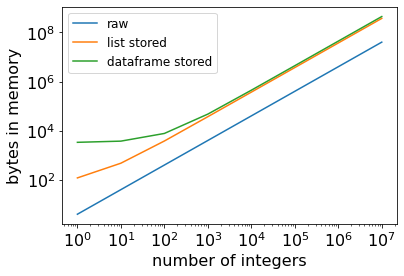

In [38]:
plt.figure()

plt.plot(np.array(nints), 4*np.array(nints), label='raw')
plt.plot(np.array(nints), np.array(lsizes), label='list stored')
plt.plot(np.array(nints), np.array(dfsizes), label='dataframe stored')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('number of integers', fontsize=16);
plt.xticks(fontsize=16);
plt.ylabel('bytes in memory', fontsize=16);
plt.yticks(fontsize=16);
plt.legend(fontsize=12);

End of "size" digression here. Sorry.

# Measuring fetch times

In [39]:
import time

### Bulk fetch

In [41]:
times_wr = []
for i in range(10):
    ts = time.perf_counter()
    aods = c3.Simulation3HourlyAODOutput.fetch(spec={"limit": -1}).objs.toJson()
    te = time.perf_counter()
    times_wr.append(te-ts)

In [42]:
times_p = []
for i in range(10):
    ts = time.perf_counter()
    aods = c3.Simulation3HourlyAODOutputPlain.fetch(spec={"limit": -1}).objs.toJson()
    te = time.perf_counter()
    times_p.append(te-ts)

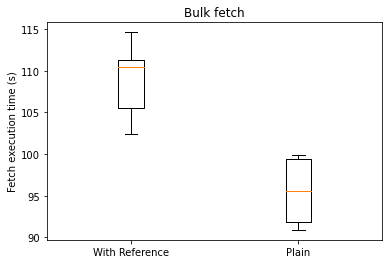

In [48]:
plt.figure()
plt.boxplot([times_wr,times_p], labels=['With Reference', 'Plain']);
plt.ylabel('Fetch execution time (s)');
plt.title('Bulk fetch');


### With fetch spec on latitudes

In [65]:
lat = 8.125
filt1 = c3.Filter().eq("value", lat)
lat_obj = c3.Latitude.fetch({"filter": filt1}).objs[0]

filt2 = c3.Filter().eq("latitude", lat_obj)

times_wr_spec = []
for i in range(10):
    ts = time.perf_counter()
    aods = c3.Simulation3HourlyAODOutput.fetch(spec={"filter": filt2, "limit": -1}).objs.toJson()
    te = time.perf_counter()
    times_wr_spec.append(te-ts)

In [66]:
lat = 8.125
filt1 = c3.Filter().eq("latitude", lat)

times_p_spec = []
for i in range(10):
    ts = time.perf_counter()
    aods = c3.Simulation3HourlyAODOutputPlain.fetch(spec={"filter": filt1, "limit": -1}).objs.toJson()
    te = time.perf_counter()
    times_p_spec.append(te-ts)

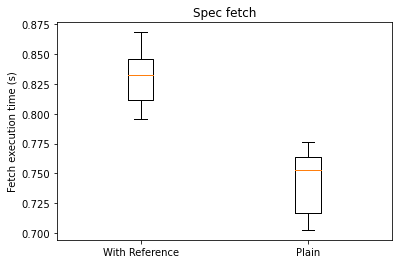

In [68]:
plt.figure()
plt.boxplot([times_wr_spec,times_p_spec], labels=['With Reference', 'Plain']);
plt.ylabel('Fetch execution time (s)');
plt.title('Spec fetch');

# Upsert new GeoSurfaceTime table

In [2]:
import pandas as pd

In [1]:
aods = c3.Simulation3HourlyAODOutputPlain.fetch({"limit": -1}).objs.toJson()

NameError: name 'pd' is not defined

In [3]:
df = pd.DataFrame(aods)

In [4]:
df2 = pd.DataFrame()

df2["latitude"] = df["latitude"]
df2["longitude"] = df["longitude"]
df2["time"] = df["time"]

In [5]:
output_records = df2.to_dict(orient="records")

In [6]:
c3.GeoSurfaceTime.upsertBatch(objs=output_records)

c3.ObjList<GeoSurfaceTime>(
 stats=c3.Stats(
         createdObjCount=221184,
         updatedObjCount=0,
         removedObjCount=0,
         failedObjCount=0,
         objCount=221184,
         dbWait=0.0,
         time=61.898,
         dbTime=14.707523595,
         objsPerSecond=3573.3626288409964,
         dbObjsPerSecond=15038.833599097143),
 objs=c3.Arry<GeoSurfaceTime>([c3.GeoSurfaceTime(
         id='4cb4b290-ac57-4f2b-8d78-5119ac4edc6c',
         meta=c3.Meta(
                created=datetime.datetime(2022, 3, 18, 18, 34, 9, tzinfo=datetime.timezone.utc),
                updated=datetime.datetime(2022, 3, 18, 18, 34, 9, tzinfo=datetime.timezone.utc),
                timestamp=datetime.datetime(2022, 3, 18, 18, 34, 9, tzinfo=datetime.timezone.utc)),
         version=1),
        c3.GeoSurfaceTime(
         id='180ac46d-1043-4e77-9753-9e0761c0cb61',
         meta=c3.Meta(
                created=datetime.datetime(2022, 3, 18, 18, 34, 9, tzinfo=datetime.timezone.utc),
            

# Upsert AOD with GeoSpaceTime 

In [1]:
import pandas as pd

file_name = "azure://monthly-mean-simulations/bs714a.pb" + "20170801" + ".pp_" + "002" + ".nc"
file = c3.SimulationOutputFile.fetch({"filter": "container == 'monthly-mean'"}).objs[0]
sample = c3.NetCDFUtil.openFile(file_name)

df_st = pd.DataFrame()

lat = sample["latitude"][:]
lon = [x*(x < 180) + (x - 360)*(x >= 180) for x in sample["longitude"][:]]
ts = file.dateTag
times = [ts.replace(hour=3), ts.replace(hour=6), ts.replace(hour=9), 
                ts.replace(hour=12), ts.replace(hour=15), ts.replace(hour=18), 
                ts.replace(hour=21), ts.replace(hour=0)]

df_st["time"] = [t for t in times for n in range(0, len(lat)*len(lon))]
df_st["latitude"] = [l for l in lat for n in range(0, len(lon))]*len(times)
df_st["longitude"] = [l for l in lon]*len(times)*len(lat)

gst = []
for i in range(len(df_st)):
    la = float(df_st["latitude"].iloc[i])
    lo = float(df_st["longitude"].iloc[i])
    ti = str(df_st["time"].iloc[i])
    #filt = c3.Filter().eq("latitude", la).and_().eq("longitude", lo).and_().eq("time", ti)
    #fetch_obj = c3.GeoSurfaceTime.fetch(spec={"filter": filt, "limit":-1})
    #if(fetch_obj.count == 0):
    geosp_obj = c3.GeoSurfaceTime.makeObj({"latitude": la, "longitude":lo, "time": ti})
    geosp_obj = geosp_obj.upsert()
    #else:
    #    geosp_obj = fetch_obj.objs[0]
    gst.append(geosp_obj)
    if ((i % 1000) == 0):
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [2]:
df = pd.DataFrame()

In [3]:
variable_names = {
            "dust" : "atmosphere_optical_thickness_due_to_dust_ambient_aerosol",
            "solubleAitkenMode" : "atmosphere_optical_thickness_due_to_soluble_aitken_mode_ambient_aerosol",
            "solubleAccumulationMode" : "atmosphere_optical_thickness_due_to_soluble_accumulation_mode_ambient_aerosol",
            "solubleCoarseMode" : "atmosphere_optical_thickness_due_to_soluble_coarse_mode_ambient_aerosol",
            "insolubleAitkenMode" : "atmosphere_optical_thickness_due_to_insoluble_aitken_mode_ambient_aerosol"
        }

In [4]:
import numpy as np

In [5]:
for var in variable_names.items():
    tensor = sample[var[1]][:][2,:,:,:]
    tensor = np.array(tensor).flatten()
    df[var[0]] = tensor

In [6]:
df["geoSurfaceTimePoint"] = gst

In [7]:
df["simulationSample"] = file.simulationSample

In [11]:
batch_size = 100
n_batches = int(len(df)/batch_size)
for i in range(n_batches):
    ni = i*batch_size
    nf = ni + batch_size
    output_records = df.iloc[ni:nf].to_dict(orient="records")
    c3.Simulation3HourlyAODOutputAllRef.upsertBatch(objs=output_records)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


In [12]:
nf

221100

In [18]:
df.iloc[nf:]

,dust,solubleAitkenMode,solubleAccumulationMode,solubleCoarseMode,insolubleAitkenMode,geoSurfaceTimePoint,simulationSample
221100,0.000337,0.001966,0.056251,0.001133,0.007262,"c3.GeoSurfaceTime(\n id='GHOQ',\n meta=c3.Meta...",c3.SimulationSample(id='EnsNo_1_SimNo_220')
221101,0.000337,0.001968,0.056245,0.001133,0.007234,"c3.GeoSurfaceTime(\n id='HOP7',\n meta=c3.Meta...",c3.SimulationSample(id='EnsNo_1_SimNo_220')
221102,0.000337,0.001969,0.056075,0.001132,0.007205,"c3.GeoSurfaceTime(\n id='GRGN',\n meta=c3.Meta...",c3.SimulationSample(id='EnsNo_1_SimNo_220')
221103,0.000337,0.001970,0.055951,0.001132,0.007177,"c3.GeoSurfaceTime(\n id='HEXI',\n meta=c3.Meta...",c3.SimulationSample(id='EnsNo_1_SimNo_220')
221104,0.000337,0.001971,0.055912,0.001132,0.007149,"c3.GeoSurfaceTime(\n id='G26N',\n meta=c3.Meta...",c3.SimulationSample(id='EnsNo_1_SimNo_220')
...,...,...,...,...,...,...,...
221179,0.000308,0.002242,0.064701,0.000837,0.006960,"c3.GeoSurfaceTime(\n id='GRG4',\n meta=c3.Meta...",c3.SimulationSample(id='EnsNo_1_SimNo_220')
221180,0.000308,0.002240,0.064880,0.000820,0.006981,"c3.GeoSurfaceTime(\n id='HEXX',\n meta=c3.Meta...",c3.SimulationSample(id='EnsNo_1_SimNo_220')
221181,0.000308,0.002240,0.065066,0.000798,0.006993,"c3.GeoSurfaceTime(\n id='HOQP',\n meta=c3.Meta...",c3.SimulationSample(id='EnsNo_1_SimNo_220')
221182,0.000308,0.002239,0.065209,0.000757,0.007012,"c3.GeoSurfaceTime(\n id='GHPB',\n meta=c3.Meta...",c3.SimulationSample(id='EnsNo_1_SimNo_220')


In [19]:
output_records = df.iloc[nf:].to_dict(orient="records")

In [20]:
c3.Simulation3HourlyAODOutputAllRef.upsertBatch(objs=output_records)

c3.ObjList<Simulation3HourlyAODOutputAllRef>(
 stats=c3.Stats(
         createdObjCount=84,
         updatedObjCount=0,
         removedObjCount=0,
         failedObjCount=0,
         objCount=84,
         dbWait=0.0,
         time=0.033,
         dbTime=0.011770249,
         objsPerSecond=2545.4545454545455,
         dbObjsPerSecond=7136.637466208234),
 objs=c3.Arry<Simulation3HourlyAODOutputAllRef>([c3.Simulation3HourlyAODOutputAllRef(
         id='def05c6b-8c68-498e-9e41-857f046cec91',
         meta=c3.Meta(
                created=datetime.datetime(2022, 3, 21, 20, 54, 19, tzinfo=datetime.timezone.utc),
                updated=datetime.datetime(2022, 3, 21, 20, 54, 19, tzinfo=datetime.timezone.utc),
                timestamp=datetime.datetime(2022, 3, 21, 20, 54, 19, tzinfo=datetime.timezone.utc)),
         version=1),
        c3.Simulation3HourlyAODOutputAllRef(
         id='97750997-2d49-420f-a773-92409fa02ad4',
         meta=c3.Meta(
                created=datetime.datetime(202

# Measure fetch time again

### With reference to GeoSurfaceTime

In [1]:
lat = -51.875
lon = 77.8125
tim = "2016-12-04T06:00:00.000"

filt1 = c3.Filter().eq("latitude", lat).and_().eq("longitude", lon).and_().eq("time", tim)
gst_obj = c3.GeoSurfaceTime.fetch({"filter": filt1}).objs[0]

In [2]:
gst_obj

c3.GeoSurfaceTime(
 id='2BZ',
 version=1,
 latitude=-51.875,
 longitude=77.8125,
 time=datetime.datetime(2016, 12, 4, 6, 0))

In [4]:
import time

In [5]:
filt2 = c3.Filter().eq("geoSurfaceTimePoint", gst_obj)

times_war_spec = []
for i in range(10):
    ts = time.perf_counter()
    aods = c3.Simulation3HourlyAODOutputAllRef.fetch(spec={"filter": filt2, "limit": -1}).objs.toJson()
    te = time.perf_counter()
    times_war_spec.append(te-ts)

[0.08569783298298717,
 0.08481012098491192,
 0.07060233410447836,
 0.07355877198278904,
 0.06889701075851917,
 0.07615500688552856,
 0.07169224787503481,
 0.06639257771894336,
 0.0733680697157979,
 0.06923491507768631]

### No reference

In [8]:
lat = -51.875
lon = 77.8125
tim = "2016-12-04T06:00:00.000"

filt1 = c3.Filter().eq("latitude", lat).and_().eq("longitude", lon).and_().eq("time", tim)

times_p = []
for i in range(10):
    ts = time.perf_counter()
    aods = c3.Simulation3HourlyAODOutputPlain.fetch(spec={"filter": filt1, "limit": -1}).objs.toJson()
    te = time.perf_counter()
    times_p.append(te-ts)

In [10]:
import matplotlib.pyplot as plt

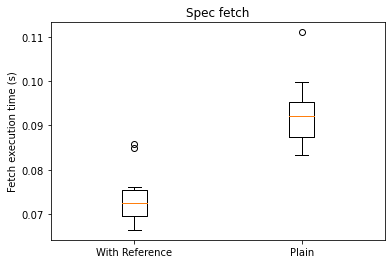

In [11]:
plt.figure()
plt.boxplot([times_war_spec,times_p], labels=['With Reference', 'Plain']);
plt.ylabel('Fetch execution time (s)');
plt.title('Spec fetch');

In [12]:
aods

[{'type': 'Simulation3HourlyAODOutputPlain',
  'id': '95550bc3-c22c-4443-a9f8-8c59e0ef5ae2',
  'meta': {'type': 'Meta',
   'tenantTagId': 151,
   'tenant': 'dev',
   'tag': 'tc02d',
   'created': '2022-03-18T14:07:32+00:00',
   'createdBy': 'babreu@illinois.edu',
   'updated': '2022-03-18T14:07:32+00:00',
   'updatedBy': 'babreu@illinois.edu',
   'timestamp': '2022-03-18T14:07:32+00:00',
   'fetchInclude': '[]',
   'fetchType': 'Simulation3HourlyAODOutputPlain'},
  'version': 1,
  'simulationSample': {'type': 'SimulationSample', 'id': 'EnsNo_1_SimNo_220'},
  'dust': 0.00106062,
  'solubleAitkenMode': 0.00331089,
  'solubleAccumulationMode': 0.0594838,
  'solubleCoarseMode': 0.0130591,
  'insolubleAitkenMode': 0.000830638,
  'latitude': -51.875,
  'longitude': 77.8125,
  'time': '2016-12-04T06:00:00'}]

# Trying suggestion from Community post

https://community.c3.ai/t/optimal-way-to-store-and-retrieve-tensor-data/9145

### Upsert GeoSurfaceTime

In [9]:
import pandas as pd

file_name = "azure://monthly-mean-simulations/bs714a.pb" + "20170801" + ".pp_" + "002" + ".nc"
file = c3.SimulationOutputFile.fetch({"filter": "container == 'monthly-mean'"}).objs[0]
sample = c3.NetCDFUtil.openFile(file_name)

df_st = pd.DataFrame()

lat = sample["latitude"][:]
lon = [x*(x < 180) + (x - 360)*(x >= 180) for x in sample["longitude"][:]]
ts = file.dateTag
times = [ts.replace(hour=3), ts.replace(hour=6), ts.replace(hour=9), 
                ts.replace(hour=12), ts.replace(hour=15), ts.replace(hour=18), 
                ts.replace(hour=21), ts.replace(hour=0)]

df_st["time"] = [t for t in times for n in range(0, len(lat)*len(lon))]
df_st["latitude"] = [l for l in lat for n in range(0, len(lon))]*len(times)
df_st["longitude"] = [l for l in lon]*len(times)*len(lat)

# This removes the need for unique in db
df_st["id"] = df_st["latitude"].astype(str) + "_" + df_st["longitude"].astype(str) + "_" + df_st["time"].astype(str) 

In [10]:
df_st

,time,latitude,longitude,id
0,2016-12-04 03:00:00,-89.375,0.9375,-89.375_0.9375_2016-12-04 03:00:00
1,2016-12-04 03:00:00,-89.375,2.8125,-89.375_2.8125_2016-12-04 03:00:00
2,2016-12-04 03:00:00,-89.375,4.6875,-89.375_4.6875_2016-12-04 03:00:00
3,2016-12-04 03:00:00,-89.375,6.5625,-89.375_6.5625_2016-12-04 03:00:00
4,2016-12-04 03:00:00,-89.375,8.4375,-89.375_8.4375_2016-12-04 03:00:00
...,...,...,...,...
221179,2016-12-04 00:00:00,89.375,-8.4375,89.375_-8.4375_2016-12-04 00:00:00
221180,2016-12-04 00:00:00,89.375,-6.5625,89.375_-6.5625_2016-12-04 00:00:00
221181,2016-12-04 00:00:00,89.375,-4.6875,89.375_-4.6875_2016-12-04 00:00:00
221182,2016-12-04 00:00:00,89.375,-2.8125,89.375_-2.8125_2016-12-04 00:00:00


In [15]:
import time

batch_size = 10
times = []

for k in range(4):
    c3.GeoSurfaceTime.removeAll()
    n_batches = int(len(df_st)/batch_size)

    ts = time.perf_counter()
    for i in range(n_batches):
        ni = i*batch_size
        nf = ni + batch_size
        output_records = df_st.iloc[ni:nf].to_dict(orient="records")
        c3.GeoSurfaceTime.upsertBatch(objs=output_records)
    te = time.perf_counter()
    times.append(te-ts)
    batch_size = batch_size*10
    print(k)

0
1
2
3


In [16]:
times

[643.7140419138595, 142.4860945660621, 94.3058767374605, 91.55491694062948]

In [17]:
import matplotlib.pyplot as plt

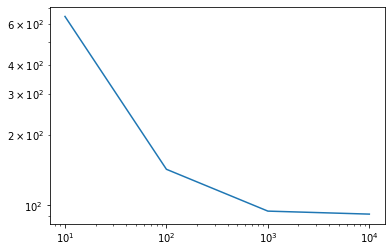

In [20]:
plt.figure()
plt.plot([10,100,1000,10000], times)
plt.yscale('log')
plt.xscale('log')

Looks like ~ 10k is the right batch size for this upsert tp `GeoSurfaceTime`.

### Upsert all of it

First construct dataframes

In [2]:
import pandas as pd
import numpy as np

# open file and get data from it
file_name = "azure://monthly-mean-simulations/bs714a.pb" + "20170801" + ".pp_" + "002" + ".nc"
file = c3.SimulationOutputFile.fetch({"filter": "container == 'monthly-mean'"}).objs[0]
sample = c3.NetCDFUtil.openFile(file_name)

# separate space-time coordinates
df_st = pd.DataFrame()

lat = sample["latitude"][:]
lon = [x*(x < 180) + (x - 360)*(x >= 180) for x in sample["longitude"][:]]
ts = file.dateTag
times = [ts.replace(hour=3), ts.replace(hour=6), ts.replace(hour=9), 
                ts.replace(hour=12), ts.replace(hour=15), ts.replace(hour=18), 
                ts.replace(hour=21), ts.replace(hour=0)]

df_st["time"] = [t for t in times for n in range(0, len(lat)*len(lon))]
df_st["latitude"] = [l for l in lat for n in range(0, len(lon))]*len(times)
df_st["longitude"] = [l for l in lon]*len(times)*len(lat)

df_st["id"] = df_st["latitude"].astype(str) + "_" + df_st["longitude"].astype(str) + "_" + df_st["time"].astype(str)


# get the variables
variable_names = {
            "dust" : "atmosphere_optical_thickness_due_to_dust_ambient_aerosol",
            "solubleAitkenMode" : "atmosphere_optical_thickness_due_to_soluble_aitken_mode_ambient_aerosol",
            "solubleAccumulationMode" : "atmosphere_optical_thickness_due_to_soluble_accumulation_mode_ambient_aerosol",
            "solubleCoarseMode" : "atmosphere_optical_thickness_due_to_soluble_coarse_mode_ambient_aerosol",
            "insolubleAitkenMode" : "atmosphere_optical_thickness_due_to_insoluble_aitken_mode_ambient_aerosol"
        }

df = pd.DataFrame()

for var in variable_names.items():
    tensor = sample[var[1]][:][2,:,:,:]
    tensor = np.array(tensor).flatten()
    df[var[0]] = tensor
    
df["simulationSample"] = file.simulationSample

Now batch upsert it with 1000 elements in each batch

In [6]:
import time

batch_size = 1000
n_batches = int(len(df_st)/batch_size)

ts = time.perf_counter()
for i in range(n_batches):
    ni = i*batch_size
    nf = ni + batch_size
    
    # first upsert spacetime type
    output_records = df_st.iloc[ni:nf].to_dict(orient="records")
    gst = c3.GeoSurfaceTime.upsertBatch(objs=output_records)
    
    # add it to the dataframe
    df_batch = pd.DataFrame(df.iloc[ni:nf])
    df_batch["geoSurfaceTimePoint"] = gst.objs
    
    # upsert
    output_records = df_batch.to_dict(orient="records")
    c3.Simulation3HourlyAODOutputAllRef.upsertBatch(objs=output_records)
    
    print(i)
te = time.perf_counter()
print("Time(s): ", (te-ts))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
Time(s):  259.15399522613734


This works reasonably and takes about 4min to upsert a file.

In [11]:
x = df_st["time"].astype(str).apply(lambda x: x.replace(" ", 'T'))

In [12]:
x

0         2016-12-04T03:00:00
1         2016-12-04T03:00:00
2         2016-12-04T03:00:00
3         2016-12-04T03:00:00
4         2016-12-04T03:00:00
                 ...         
221179    2016-12-04T00:00:00
221180    2016-12-04T00:00:00
221181    2016-12-04T00:00:00
221182    2016-12-04T00:00:00
221183    2016-12-04T00:00:00
Name: time, Length: 221184, dtype: object

# Running batch job to upsert it

### Multi-node scaling

In [9]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=13)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  662.8236192222685


In [11]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=26)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  823.9061394426972


In [13]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=52)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  913.9935891628265


In [15]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=104)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  2160.159673459828


In [1]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=181)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

KeyboardInterrupt: 

In [2]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=223)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  1326.6329943425953


In [2]:
job.status()

c3.BatchJobStatus(
 started=datetime.datetime(2022, 4, 4, 19, 19, 12, tzinfo=datetime.timezone.utc),
 startedby='babreu@illinois.edu',
 status='running',
 newBatchSubmitted=True)

In [3]:
job.cancel()

c3.BatchJobStatus(
 started=datetime.datetime(2022, 4, 4, 19, 19, 12, tzinfo=datetime.timezone.utc),
 startedby='babreu@illinois.edu',
 completed=datetime.datetime(2022, 4, 4, 19, 54, 43, tzinfo=datetime.timezone.utc),
 status='canceled',
 newBatchSubmitted=True)

In [5]:
job.status()

c3.BatchJobStatus(
 started=datetime.datetime(2022, 4, 4, 19, 19, 12, tzinfo=datetime.timezone.utc),
 startedby='babreu@illinois.edu',
 completed=datetime.datetime(2022, 4, 4, 19, 54, 43, tzinfo=datetime.timezone.utc),
 status='canceled',
 newBatchSubmitted=True)

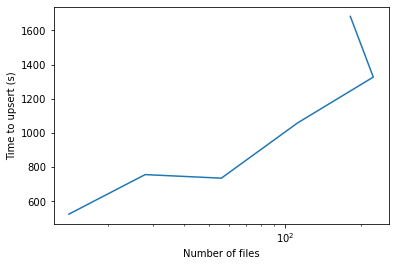

In [7]:
import matplotlib.pyplot as plt

x = [14, 28, 56, 112, 223, 181]
y = [522.44, 754.33, 733.41, 1057.53, 1326.63, 1682.47] # didn't clean table

plt.figure()
plt.plot(x,y)
plt.xlabel('Number of files')
plt.ylabel('Time to upsert (s)')
plt.xscale('log')

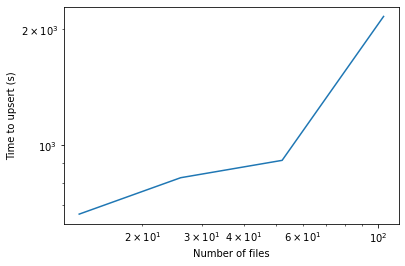

In [19]:
import matplotlib.pyplot as plt

x = [13, 26, 52, 104]
y = [662.82, 823.91, 913.99, 2160.16] 

plt.figure()
plt.plot(x,y)
plt.xlabel('Number of files')
plt.ylabel('Time to upsert (s)')
plt.xscale('log')
plt.yscale('log')

### Single node scaling

In [7]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=3)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  612.6691439738497


In [9]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=6)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  582.5432165134698


In [11]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=9)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  743.1541572809219


In [13]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=12)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  823.5532871773466


In [15]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=13)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  884.2342393714935


In [17]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=14)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  843.6551738092676


In [18]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=28)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  1416.0838331347331


### 5 nodes

In [24]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=70)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  776.0153011549264


### 8 nodes

In [26]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=112)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  884.3136046621948


### 14 nodes

In [29]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=196)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  1135.173195364885


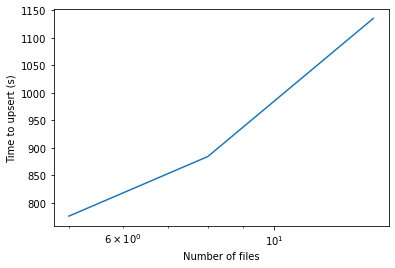

In [35]:
nodes = [3, 5, 8, 14]
files = [42, 70, 112, 196]
times = [None, 776.02, 884.31, 1135.17]

import matplotlib.pyplot as plt

plt.figure()
plt.plot(nodes,times)
plt.xlabel('Number of files')
plt.ylabel('Time to upsert (s)')
plt.xscale('log')
#plt.yscale('log')

### All possible nodes, all files from one SimSam

15 worker nodes running

In [83]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=599)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

KeyboardInterrupt: 

In [91]:
job.status()

c3.BatchJobStatus(
 started=datetime.datetime(2022, 4, 5, 20, 1, 37, tzinfo=datetime.timezone.utc),
 startedby='babreu@illinois.edu',
 completed=datetime.datetime(2022, 4, 5, 20, 20, 6, tzinfo=datetime.timezone.utc),
 status='canceled',
 newBatchSubmitted=True)

In [89]:
job.cancel()

c3.BatchJobStatus(
 started=datetime.datetime(2022, 4, 5, 20, 1, 37, tzinfo=datetime.timezone.utc),
 startedby='babreu@illinois.edu',
 completed=datetime.datetime(2022, 4, 5, 20, 20, 6, tzinfo=datetime.timezone.utc),
 status='canceled',
 newBatchSubmitted=True)

In [72]:
import pandas as pd
batches = job.fetch({"limit": -1}).objs.toJson()
batches = pd.DataFrame(batches)

In [73]:
batches

,type,run,priority,maxConcurrency,maxConcurrencyPerNode,runAsUser,numAutoRecoveryAttempts,typeIdent,id,meta,version,options
0,UpsertAODData,"{'type': 'BatchJobRun', 'jobId': '12c01a43-471...",300,-1,-1,False,0,BATCHJ:PSRT_MNTHMNDT,12c01a43-4714-49d1-bde9-279f9ec29ea0,"{'type': 'Meta', 'tenantTagId': 151, 'tenant':...",3,"{'type': 'UpsertAODDataOptions', 'batchSize': ..."
1,UpsertAODData,"{'type': 'BatchJobRun', 'jobId': '1aee1f9d-afc...",300,-1,-1,False,0,BATCHJ:PSRT_MNTHMNDT,1aee1f9d-afc1-43c4-b361-88b6e8a0e1af,"{'type': 'Meta', 'tenantTagId': 151, 'tenant':...",3,"{'type': 'UpsertAODDataOptions', 'batchSize': ..."
2,UpsertAODData,"{'type': 'BatchJobRun', 'jobId': '1bc5e7ba-3ff...",300,-1,-1,False,0,BATCHJ:PSRT_MNTHMNDT,1bc5e7ba-3ff2-4b8f-92e2-9a5d5b921c9c,"{'type': 'Meta', 'tenantTagId': 151, 'tenant':...",3,"{'type': 'UpsertAODDataOptions', 'batchSize': ..."
3,UpsertAODData,"{'type': 'BatchJobRun', 'jobId': '2704eb8a-485...",300,-1,-1,False,0,BATCHJ:PSRT_MNTHMNDT,2704eb8a-4853-48e0-98f6-8ba951d67fb7,"{'type': 'Meta', 'tenantTagId': 151, 'tenant':...",3,"{'type': 'UpsertAODDataOptions', 'batchSize': ..."
4,UpsertAODData,"{'type': 'BatchJobRun', 'jobId': '2a083379-23e...",300,-1,-1,False,0,BATCHJ:PSRT_MNTHMNDT,2a083379-23e1-4e91-9d08-3a2a6ad2334e,"{'type': 'Meta', 'tenantTagId': 151, 'tenant':...",3,"{'type': 'UpsertAODDataOptions', 'batchSize': ..."
5,UpsertAODData,"{'type': 'BatchJobRun', 'jobId': '3f759720-df8...",300,-1,-1,False,0,BATCHJ:PSRT_MNTHMNDT,3f759720-df82-4d42-b6fb-f3d42f60e94e,"{'type': 'Meta', 'tenantTagId': 151, 'tenant':...",3,"{'type': 'UpsertAODDataOptions', 'batchSize': ..."
6,UpsertAODData,"{'type': 'BatchJobRun', 'jobId': '445a30ac-83f...",300,-1,-1,False,0,BATCHJ:PSRT_MNTHMNDT,445a30ac-83fd-4480-a1fb-14553e6f2a0d,"{'type': 'Meta', 'tenantTagId': 151, 'tenant':...",3,"{'type': 'UpsertAODDataOptions', 'batchSize': ..."
7,UpsertAODData,"{'type': 'BatchJobRun', 'jobId': '5a7867c9-72d...",300,-1,-1,False,0,BATCHJ:PSRT_MNTHMNDT,5a7867c9-72d0-4374-9970-4efb93d495cc,"{'type': 'Meta', 'tenantTagId': 151, 'tenant':...",3,"{'type': 'UpsertAODDataOptions', 'batchSize': ..."
8,UpsertAODData,"{'type': 'BatchJobRun', 'jobId': '7c52b940-574...",300,-1,-1,False,0,BATCHJ:PSRT_MNTHMNDT,7c52b940-574d-4177-9611-f38af7cfc911,"{'type': 'Meta', 'tenantTagId': 151, 'tenant':...",3,"{'type': 'UpsertAODDataOptions', 'batchSize': ..."
9,UpsertAODData,"{'type': 'BatchJobRun', 'jobId': '8f80c3fe-d8e...",300,-1,-1,False,0,BATCHJ:PSRT_MNTHMNDT,8f80c3fe-d8e2-49a0-a12d-190a4acac44d,"{'type': 'Meta', 'tenantTagId': 151, 'tenant':...",3,"{'type': 'UpsertAODDataOptions', 'batchSize': ..."


In [74]:
batch = job.fetch({"limit": -1}).objs

In [75]:
batch

c3.UpsertAODData(
 run=c3.BatchJobRun(
       jobId='12c01a43-4714-49d1-bde9-279f9ec29ea0',
       status=c3.BatchJobStatus(
                started=datetime.datetime(2022, 4, 5, 11, 52, 28, tzinfo=datetime.timezone.utc),
                startedby='babreu@illinois.edu',
                completed=datetime.datetime(2022, 4, 5, 12, 6, 57, tzinfo=datetime.timezone.utc),
                status='completed',
                newBatchSubmitted=False),
       started=datetime.datetime(2022, 4, 5, 11, 52, 28, tzinfo=datetime.timezone.utc),
       remainingAutoRecoveryAttempts=0,
       id='JOXX',
       version=5),
 priority=300,
 maxConcurrency=-1,
 maxConcurrencyPerNode=-1,
 runAsUser=False,
 numAutoRecoveryAttempts=0,
 typeIdent='BATCHJ:PSRT_MNTHMNDT',
 id='12c01a43-4714-49d1-bde9-279f9ec29ea0',
 meta=c3.Meta(
        tenantTagId=151,
        tenant='dev',
        tag='tc02d',
        created=datetime.datetime(2022, 4, 5, 11, 52, 28, tzinfo=datetime.timezone.utc),
        createdBy='babreu@ill

In [76]:
c3.Simulation3HourlyAODOutputAllRef.fetchCount()

131162112

In [77]:
c3.GeoSurfaceTime.fetchCount()

69672776

# Batch job to clean table

In [45]:
c3.Simulation3HourlyAODOutputAllRef.removeAll(disableAsyncProcessing=True)

Json request to /api/1/dev/tc02d/Simulation3HourlyAODOutputAllRef?action=removeAll failed with response ServerResponse(statusCode=504, content='<html>\r\n<head><title>504 Gateway Time-out</title></head>\r\n<body>\r\n<center><h1>504 Gateway Time-out</h1></center>\r\n<hr><center>Microsoft-Azure-Application-Gateway/v2</center>\r\n</body>\r\n</html>\r\n', headers={'Server': 'Microsoft-Azure-Application-Gateway/v2', 'Date': 'Wed, 06 Apr 2022 02:36:59 GMT', 'Content-Type': 'text/html', 'Content-Length': '193', 'Connection': 'keep-alive'})


RuntimeError: Json request to /api/1/dev/tc02d/Simulation3HourlyAODOutputAllRef?action=removeAll failed with response ServerResponse(statusCode=504, content='<html>\r\n<head><title>504 Gateway Time-out</title></head>\r\n<body>\r\n<center><h1>504 Gateway Time-out</h1></center>\r\n<hr><center>Microsoft-Azure-Application-Gateway/v2</center>\r\n</body>\r\n</html>\r\n', headers={'Server': 'Microsoft-Azure-Application-Gateway/v2', 'Date': 'Wed, 06 Apr 2022 02:36:59 GMT', 'Content-Type': 'text/html', 'Content-Length': '193', 'Connection': 'keep-alive'})

In [1]:
c3.GeoSurfaceTime.removeAll(allowMultiRowProcessing=True, disableAsyncProcessing=True)

38486016

# Fetch data from one simulation

In [78]:
import time

lat = 11.875
lon = 70.3125
tim = "2017-09-17T15:00:00"

filt1 = c3.Filter().eq("latitude", lat).and_().eq("longitude", lon).and_().eq("time", tim)
gst_obj = c3.GeoSurfaceTime.fetch({"filter": filt1}).objs[0]

filt2 = c3.Filter().eq("geoSurfaceTimePoint", gst_obj)

times_war_spec = []
for i in range(10):
    ts = time.perf_counter()
    aods = c3.Simulation3HourlyAODOutputAllRef.fetch(spec={"filter": filt2, "limit": -1}).objs.toJson()
    te = time.perf_counter()
    times_war_spec.append(te-ts)

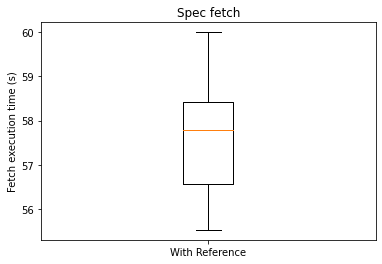

In [79]:
plt.figure()
plt.boxplot([times_war_spec], labels=['With Reference']);
plt.ylabel('Fetch execution time (s)');
plt.title('Spec fetch');

In [80]:
aods

[{'type': 'Simulation3HourlyAODOutputAllRef',
  'id': '193177e6-7452-4892-9c11-83eed008847f',
  'meta': {'type': 'Meta',
   'tenantTagId': 151,
   'tenant': 'dev',
   'tag': 'tc02d',
   'created': '2022-04-05T18:14:05+00:00',
   'createdBy': 'worker',
   'updated': '2022-04-05T18:14:05+00:00',
   'updatedBy': 'worker',
   'timestamp': '2022-04-05T18:14:05+00:00',
   'fetchInclude': '[]',
   'fetchType': 'Simulation3HourlyAODOutputAllRef'},
  'version': 1,
  'simulationSample': {'type': 'SimulationSample', 'id': 'EnsNo_1_SimNo_220'},
  'dust': 0.00169036,
  'solubleAitkenMode': 0.00485631,
  'solubleAccumulationMode': 0.0926484,
  'solubleCoarseMode': 0.0223832,
  'insolubleAitkenMode': 0.00123311,
  'geoSurfaceTimePoint': {'type': 'GeoSurfaceTime',
   'id': '11.875_70.3125_2017-09-17T15:00:00'}},
 {'type': 'Simulation3HourlyAODOutputAllRef',
  'id': 'f8ddab52-3e73-42e8-a2fb-cdab2a4097ba',
  'meta': {'type': 'Meta',
   'tenantTagId': 151,
   'tenant': 'dev',
   'tag': 'tc02d',
   'creat

### Process one file Postgres

In [100]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=1)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  351.70830244012177


In [11]:
c3.Simulation3HourlyAODOutputAllRef.fetchCount()

KeyboardInterrupt: 

In [12]:
c3.GeoSurfaceTime.fetchCount()

1548288

### Postgres fetch

In [104]:
import time

lat = -0.625
lon = -0.9375
tim = "2016-12-04T00:00:00.000"

filt1 = c3.Filter().eq("latitude", lat).and_().eq("longitude", lon).and_().eq("time", tim)
gst_obj = c3.GeoSurfaceTime.fetch({"filter": filt1}).objs[0]

filt2 = c3.Filter().eq("geoSurfaceTimePoint", gst_obj)

times_war_spec = []
for i in range(10):
    ts = time.perf_counter()
    aods = c3.Simulation3HourlyAODOutputAllRef.fetch(spec={"filter": filt2, "limit": -1}).objs.toJson()
    te = time.perf_counter()
    times_war_spec.append(te-ts)

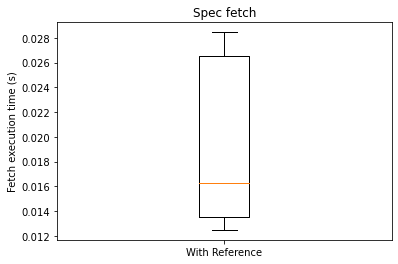

In [105]:
plt.figure()
plt.boxplot([times_war_spec], labels=['With Reference']);
plt.ylabel('Fetch execution time (s)');
plt.title('Spec fetch');

### Process one file Cassandra and fetch

In [1]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=1)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  1020.9313885783777


In [9]:
import time

lat = -0.625
lon = -0.9375
tim = "2016-12-04T00:00:00.000"

filt1 = c3.Filter().eq("latitude", lat).and_().eq("longitude", lon).and_().eq("time", tim)
gst_obj = c3.GeoSurfaceTime.fetch({"filter": filt1}).objs[0]

filt2 = c3.Filter().eq("geoSurfaceTimePoint", gst_obj)

times_war_spec = []
for i in range(10):
    ts = time.perf_counter()
    aods = c3.Simulation3HourlyAODOutputAllRef.fetch(spec={"filter": filt2, "limit": -1}).objs.toJson()
    te = time.perf_counter()
    times_war_spec.append(te-ts)

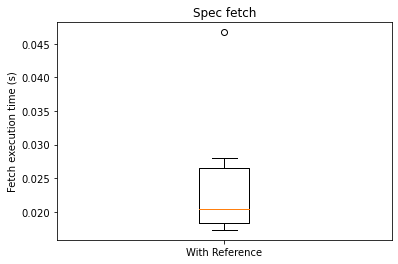

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot([times_war_spec], labels=['With Reference']);
plt.ylabel('Fetch execution time (s)');
plt.title('Spec fetch');

### Big Cassandra insert

In [7]:
import time

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=200, offset=402)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  834.0057665174827


In [8]:
print(job.status().errors[0].errorLog)

c3.love.exceptions.C3RuntimeException: Error executing command: /usr/local/share/c3/condaEnvs/dev/tc02d/py-gordon_1_0_0/bin/python /tmp/pythonActionSourceCache8689855920833597440/SimulationOutputFile_upsert3HourlyAODAllRefData.py
Process exited with 3 exit code.
a_id=5826.265947029 a_implementation=python t_tenant=dev t_tag=tc02d t_type=SimulationOutputFile t_action=upsert3HourlyAODAllRefData p_logger=action url=http://dev-dti-app-w-011:8080 connector=null mode="thick" Action failed!
Traceback (most recent call last):
  File "/tmp/pythonActionSourceCache8689855920833597440/SimulationOutputFile_upsert3HourlyAODAllRefData.py", line 406, in _c3_remote_bootstrap__run_c3_action
    _c3_result = _action()
  File "/tmp/pythonActionSourceCache8689855920833597440/SimulationOutputFile_upsert3HourlyAODAllRefData.py", line 530, in <lambda>
    action=lambda: upsert3HourlyAODAllRefData(this = _c3_inputs.get('this')),
  File "SimulationOutputFile.py", line 281, in upsert3HourlyAODAllRefData
    c3.S

In [42]:
print(job.status().errors[30].errorLog)

c3.love.exceptions.C3RuntimeException: Error executing command: /usr/local/share/c3/condaEnvs/dev/tc02d/py-gordon_1_0_0/bin/python /tmp/pythonActionSourceCache4941866486097983016/SimulationOutputFile_upsert3HourlyAODAllRefData.py
Process exited with 3 exit code.
a_id=4299.103327694 a_implementation=python t_tenant=dev t_tag=tc02d t_type=SimulationOutputFile t_action=upsert3HourlyAODAllRefData p_logger=action url=http://dev-dti-app-w-008:8080 connector=null mode="thick" Action failed!
Traceback (most recent call last):
  File "/tmp/pythonActionSourceCache4941866486097983016/SimulationOutputFile_upsert3HourlyAODAllRefData.py", line 406, in _c3_remote_bootstrap__run_c3_action
    _c3_result = _action()
  File "/tmp/pythonActionSourceCache4941866486097983016/SimulationOutputFile_upsert3HourlyAODAllRefData.py", line 530, in <lambda>
    action=lambda: upsert3HourlyAODAllRefData(this = _c3_inputs.get('this')),
  File "SimulationOutputFile.py", line 268, in upsert3HourlyAODAllRefData
    gst 

In [4]:
job.cancel()

c3.BatchJobStatus(
 started=datetime.datetime(2022, 4, 6, 12, 52, 20, tzinfo=datetime.timezone.utc),
 startedby='babreu@illinois.edu',
 completed=datetime.datetime(2022, 4, 6, 13, 8, 20, tzinfo=datetime.timezone.utc),
 status='canceled',
 errors=c3.Arry<JobRunErrorDetail>([c3.JobRunErrorDetail(
           failedActionId='1844.1411394',
           errorMsg='Error executing command: '
                     '/usr/local/share/c3/condaEnvs/dev/tc02d/py-gordon_1_0_0/bin/python '
                     '/tmp/pythonActionSourceCache4099868935305653497/SimulationOutputFile_upsert3HourlyAODAllRefData.py\n'
                     'Process exited with 3 exit code.\n'
                     'a_id=1844.1411808 a_implementation=python t_tenant=dev '
                     't_tag=tc02d t_type=SimulationOutputFile '
                     't_action=upsert3HourlyAODAllRefData p_logger=action '
                     'url=http://dev-dti-app-w-002:8080 connector=null '
                     'mode="thick" Action failed!

### Final jobs

In [15]:
npFilter = c3.Filter().not_().exists('processMeta')

In [16]:
npFilter

c3.Filter(value='!exists(processMeta)')

In [18]:
import time

npFilter = c3.Filter().not_().exists('processMeta')

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=200, filter=npFilter)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

KeyboardInterrupt: 

In [23]:
failFilter = c3.Filter().exists('processMeta').and_().eq('processMeta.lastAttemptFailed',True)

In [25]:
import time

failFilter = c3.Filter().exists('processMeta').and_().eq('processMeta.lastAttemptFailed',True)

jobOptions = c3.UpsertAODDataOptions(batchSize=1, limit=200, filter=failFilter)
job = c3.UpsertAODData(options=jobOptions).upsert()

ts = time.perf_counter()
job.start()
time.sleep(10)
while job.status().status == 'running':
    time.sleep(10)    
te = time.perf_counter()

print("Batch job took: ", (te-ts))

Batch job took:  1877.660779921338


### Fetching Cassandra

In [28]:
import time

lat = -0.625
lon = -0.9375
tim = "2016-12-04T00:00:00.000"

filt1 = c3.Filter().eq("latitude", lat).and_().eq("longitude", lon).and_().eq("time", tim)
gst_obj = c3.GeoSurfaceTimePoint.fetch({"filter": filt1}).objs[0]

filt2 = c3.Filter().eq("geoSurfaceTimePoint", gst_obj)

times_war_spec = []
for i in range(10):
    ts = time.perf_counter()
    aods = c3.Simulation3HourlyAODOutputAllRef.fetch(spec={"filter": filt2, "limit": -1}).objs.toJson()
    te = time.perf_counter()
    times_war_spec.append(te-ts)

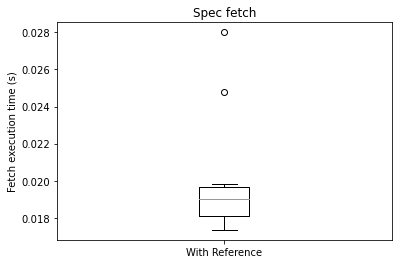

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot([times_war_spec], labels=['With Reference']);
plt.ylabel('Fetch execution time (s)');
plt.title('Spec fetch');

In [30]:
aods

[{'type': 'Simulation3HourlyAODOutputAllRef',
  'id': '-0.625_-0.9375_2016-12-04T00:00:00#GQC7FQ',
  'version': 1,
  'simulationSample': {'type': 'SimulationSample', 'id': 'EnsNo_1_SimNo_0'},
  'dust': 0.00072586536,
  'solubleAitkenMode': 0.00054613163,
  'solubleAccumulationMode': 0.052775044,
  'solubleCoarseMode': 0.027565734,
  'insolubleAitkenMode': 0.0003334224,
  'geoSurfaceTimePoint': {'type': 'GeoSurfaceTimePoint',
   'id': '-0.625_-0.9375_2016-12-04T00:00:00'}},
 {'type': 'Simulation3HourlyAODOutputAllRef',
  'id': '-0.625_-0.9375_2016-12-04T00:00:00#HJMEA',
  'version': 1,
  'simulationSample': {'type': 'SimulationSample', 'id': 'EnsNo_1_SimNo_220'},
  'dust': 0.011050184,
  'solubleAitkenMode': 0.0069999574,
  'solubleAccumulationMode': 0.16840069,
  'solubleCoarseMode': 0.0059925043,
  'insolubleAitkenMode': 0.035404887,
  'geoSurfaceTimePoint': {'type': 'GeoSurfaceTimePoint',
   'id': '-0.625_-0.9375_2016-12-04T00:00:00'}},
 {'type': 'Simulation3HourlyAODOutputAllRef',
 